Import the necessary libraries.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

#1. Perspective Projection Correction(30%)
Correct the source image in reference with the destination image.

In [2]:
# Download the images
!gdown --id '199sL6_fCVbx_CYGJ2FWA99zUQwWM0KC7' --output book1.jpg
!gdown --id '1RVHKVDdcYOtWSehQthl32V7OvSCVfuWQ' --output book2.jpg

Downloading...
From: https://drive.google.com/uc?id=199sL6_fCVbx_CYGJ2FWA99zUQwWM0KC7
To: /content/book1.jpg
100% 155k/155k [00:00<00:00, 1.85MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RVHKVDdcYOtWSehQthl32V7OvSCVfuWQ
To: /content/book2.jpg
100% 153k/153k [00:00<00:00, 1.53MB/s]


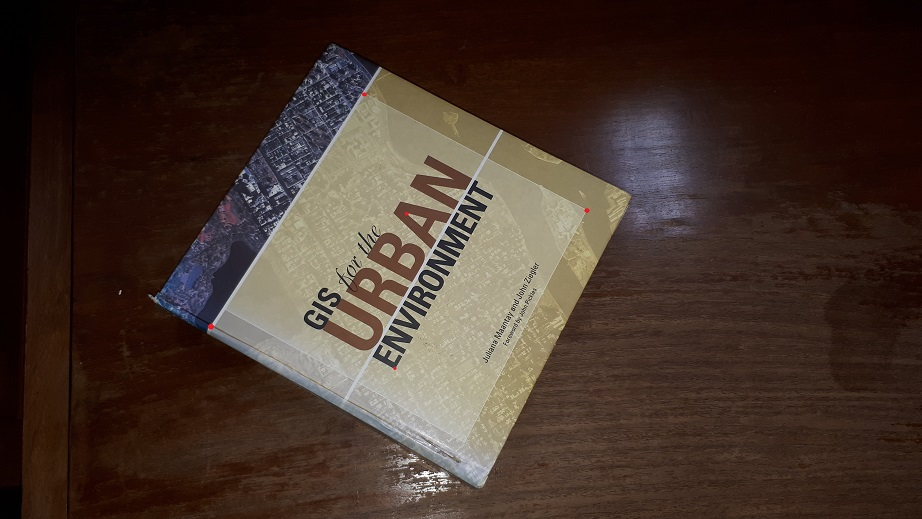

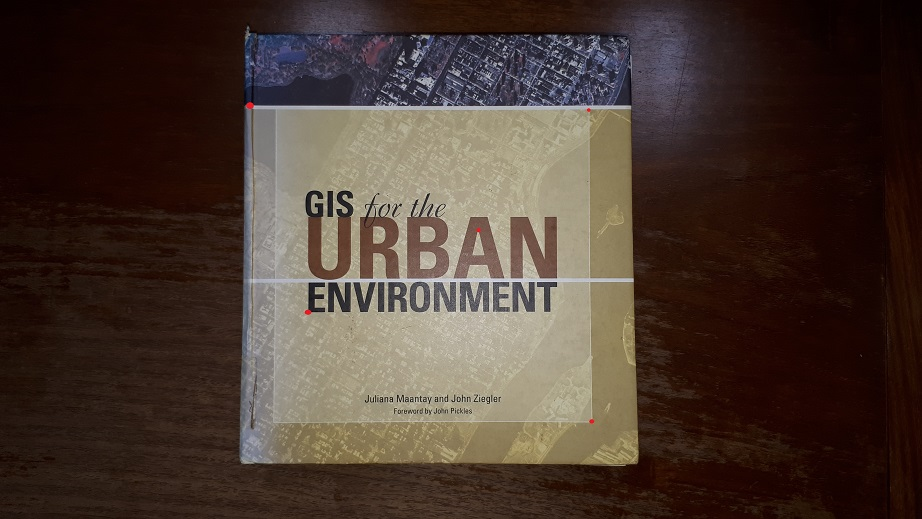

In [3]:
# TODO: Read the source image(book1.jpg) and destination image(book2.jpg)
filename1 = 'book1.jpg'
filename2 = 'book2.jpg'
img1 = cv2.imread(filename1)
img2 = cv2.imread(filename2)

# TODO: Display the images
cv2_imshow(img1)
cv2_imshow(img2)

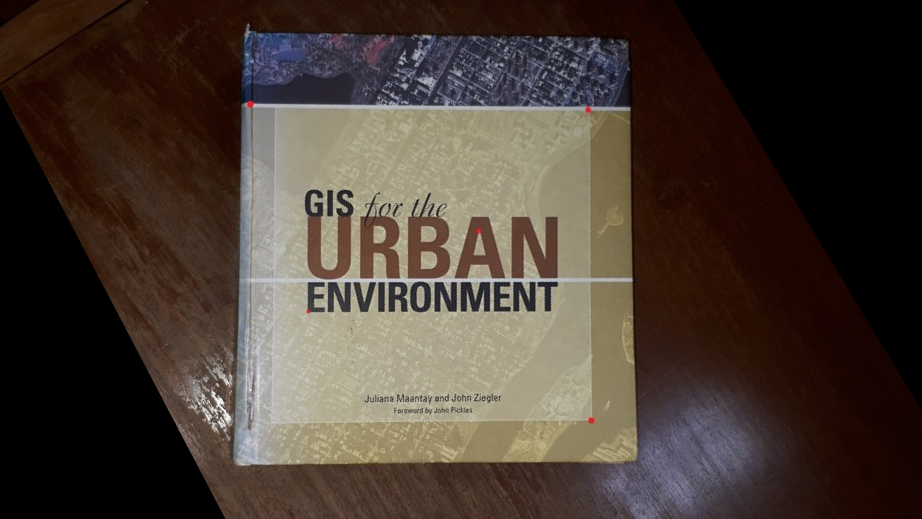

In [4]:
# Identify the coordinates of the points marked in red color in the source image
pts_src = np.array([[211, 327], [364, 94], [407, 213], [394, 368], [587, 210]])
# Identify the coordinates of the points marked in red color in the destination image
pts_dst = np.array([[249, 105], [588, 110], [479, 230], [308, 311], [591, 421]])
# TODO: Calculate the homography 
# hint: cv2.findHomography
h, status = cv2.findHomography(pts_src, pts_dst)

# TODO: Wrap the images
# hint: cv2.warpPerspective
im_out = cv2.warpPerspective(img1, h, (img2.shape[1],img2.shape[0]))

# Display the corrected image
cv2_imshow(im_out)

#2. Image Stitching(50%)
Stitch first two images into one from the image dataset

Downloading...
From: https://drive.google.com/uc?id=1TBD8gqTlF5W6YUa4alCly8Br7IsnFAWd
To: /content/site1.jpg
100% 565k/565k [00:00<00:00, 4.49MB/s]
Downloading...
From: https://drive.google.com/uc?id=1louxVWOPMq1qp1spyxYuUT4UcT_cJh_a
To: /content/site2.jpg
100% 544k/544k [00:00<00:00, 4.04MB/s]
Downloading...
From: https://drive.google.com/uc?id=14h6HtidygfEfyX1Mjv4XhemEKpC1J303
To: /content/site3.jpg
100% 549k/549k [00:00<00:00, 4.26MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IBvarpY0uCsxf5vSrPCRJw083cLbgd_N
To: /content/site4.jpg
100% 553k/553k [00:00<00:00, 4.31MB/s]
Downloading...
From: https://drive.google.com/uc?id=1SLEoV34VQUyhs_kIj_7telEwm1QLFVfn
To: /content/site5.jpg
100% 554k/554k [00:00<00:00, 3.44MB/s]
Downloading...
From: https://drive.google.com/uc?id=1oOeENxhnN06YIbdi6DldkE7MDt1tMqAD
To: /content/site6.jpg
100% 576k/576k [00:00<00:00, 4.15MB/s]


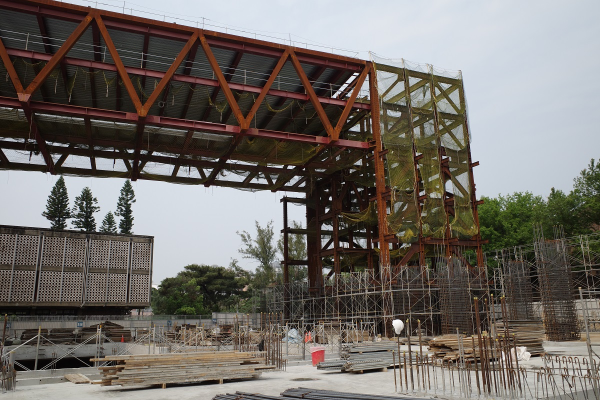

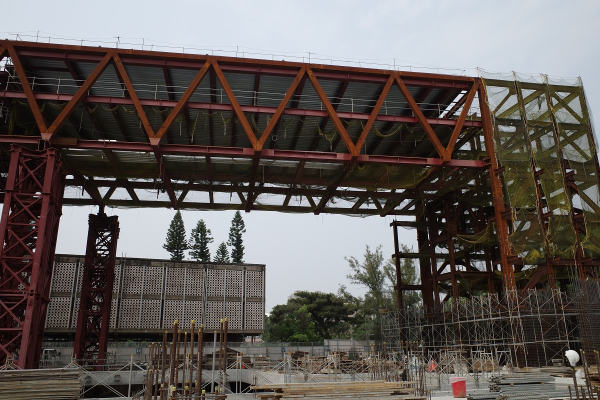

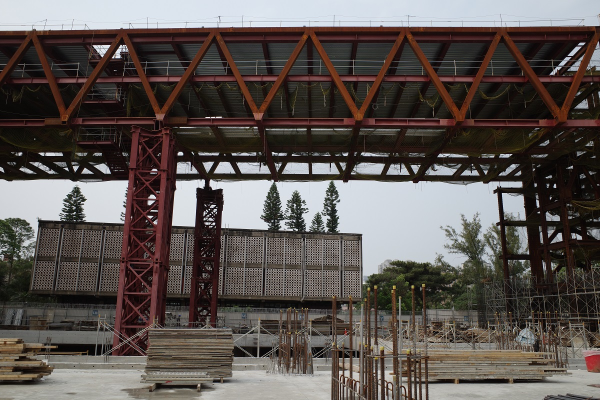

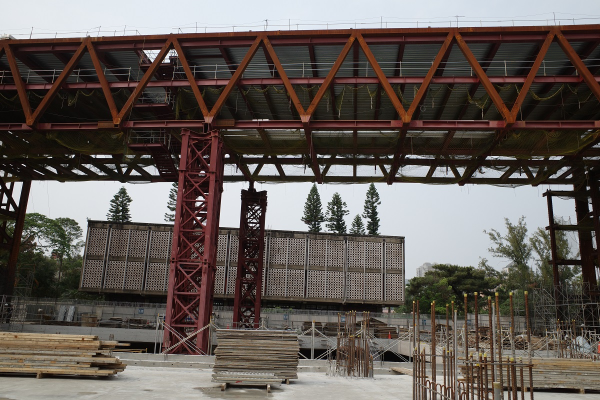

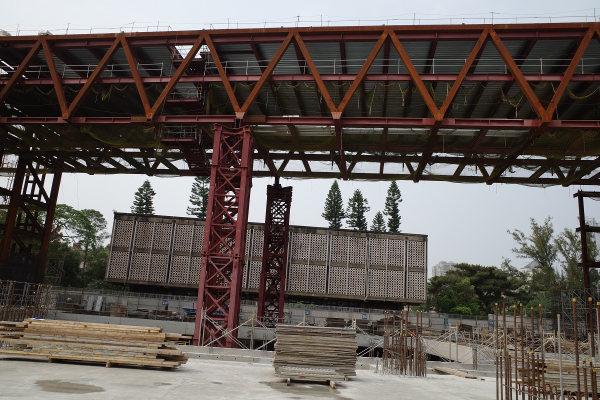

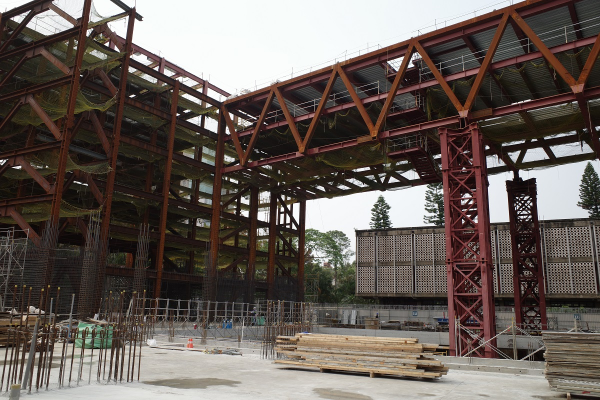

In [5]:
# download the images (6 Images)
!gdown --id '1TBD8gqTlF5W6YUa4alCly8Br7IsnFAWd' --output site1.jpg
!gdown --id '1louxVWOPMq1qp1spyxYuUT4UcT_cJh_a' --output site2.jpg
!gdown --id '14h6HtidygfEfyX1Mjv4XhemEKpC1J303' --output site3.jpg
!gdown --id '1IBvarpY0uCsxf5vSrPCRJw083cLbgd_N' --output site4.jpg
!gdown --id '1SLEoV34VQUyhs_kIj_7telEwm1QLFVfn' --output site5.jpg
!gdown --id '1oOeENxhnN06YIbdi6DldkE7MDt1tMqAD' --output site6.jpg

# Use opencv to read the original image
img_1 = cv2.imread('site1.jpg')
img_2 = cv2.imread('site2.jpg')
img_3 = cv2.imread('site3.jpg')
img_4 = cv2.imread('site4.jpg')
img_5 = cv2.imread('site5.jpg')
img_6 = cv2.imread('site6.jpg')

# Resize images for convenience
def resizeimg (img):
  img_resized = cv2.resize(img, (int(img.shape[1]*0.5), int(img.shape[0]*0.5)), interpolation = cv2.INTER_AREA)
  return img_resized 
  
img_1 = resizeimg(img_1)
img_2 = resizeimg(img_2)
img_3 = resizeimg(img_3)
img_4 = resizeimg(img_4)
img_5 = resizeimg(img_5)
img_6 = resizeimg(img_6)

# Display the images
cv2_imshow(img_1)
cv2_imshow(img_2)
cv2_imshow(img_3)
cv2_imshow(img_4)
cv2_imshow(img_5)
cv2_imshow(img_6)


In [6]:
# Write a function named 'imagestitcher' that can stitch two images
def imagestitcher (img1, img2):
  
  # TODO: Convert input images to grayscale in order to achieve more accurate results
  img_gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
  img_gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
  # TODO: SIFT Feature detection
  sift = cv2.SIFT_create()
  # TODO: Find the key points and descriptors
  kp1, des1 = sift.detectAndCompute(img_gray1,None)
  kp2, des2 = sift.detectAndCompute(img_gray2,None)
  
  # Feature matching use cv2.BFMatcher(), bf.knnMatch
  # TODO: Create a BFMatcher object. It will find all of the matching keypoints on two images
  bf = cv2.BFMatcher()
  # TODO: find matching points
  matches =  bf.knnMatch(des1,des2, 2)# K nearest neighbour matching with k=2

  good = [] # Store good matches into a list if the distance between corresponding matches lies between 0.5
  for m in matches:
    if (m[0].distance < 0.5*m[1].distance):
      good.append(m)
  matches = np.asarray(good)
  
  if (len(matches[:,0]) >= 4): # Make ture that we have enough keypoints
      src = np.float32([ kp1[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
      dst = np.float32([ kp2[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
      # TODO: Calculate the homography 
      # hint: cv2.findHomography, adding cv2.RANSAC and reprojection theshold=5 as the third and forth parameter
      H, masked = cv2.findHomography(src, dst, cv2.RANSAC,5.0)       
  else:
      raise AssertionError('Can’t find enough keypoints.')
  
  # TODO: Image Stitching 
  # hint: cv2.warpPerspective((1st image, homography matrix, size of the output image)
  dst = cv2.warpPerspective(img1, H, (img2.shape[1]*2,img2.shape[0]))
  dst[0:img2.shape[0], 0:img2.shape[1]] = img2 #stitched image
  return dst

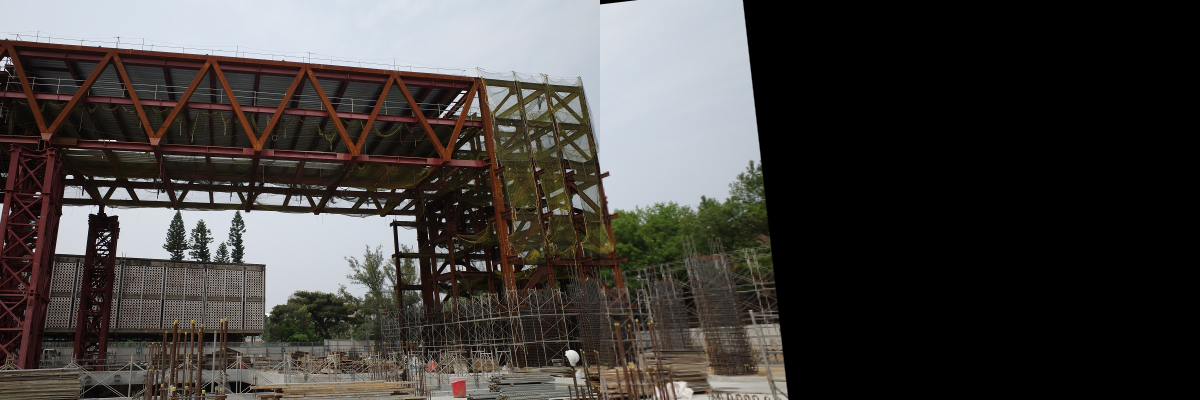

In [7]:
# TODO: Stitch the first two site images into one and display
stitched_img = imagestitcher (img_1, img_2)
cv2_imshow(stitched_img)

#3. Panorama creation
Create a panorama combining all 6 images

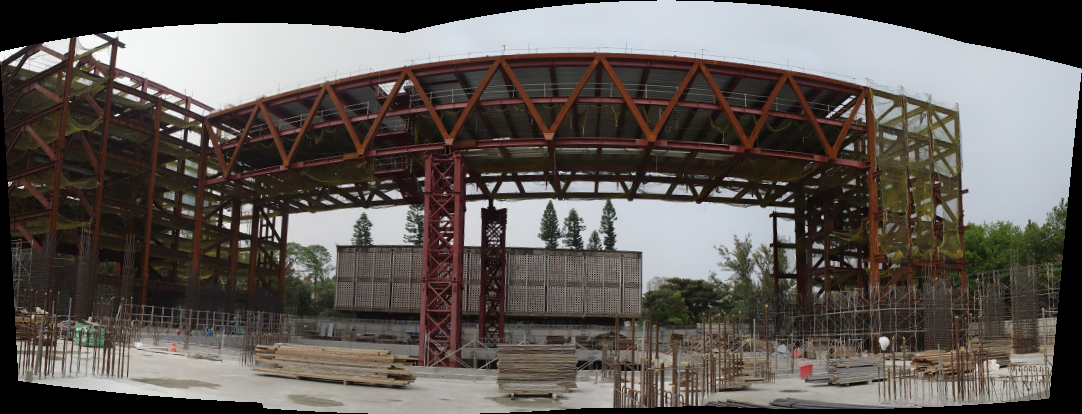

In [8]:
# TODO: Stitch all 6 images to make a Panorama
imgs = []
imgs.append(img_1)
imgs.append(img_2)
imgs.append(img_3)
imgs.append(img_4)
imgs.append(img_5)
imgs.append(img_6)

stitcher = cv2.Stitcher.create(cv2.Stitcher_PANORAMA)
_result, pano = stitcher.stitch(imgs)

# TODO: Display the panorama image
cv2_imshow(pano)
